## German Credit Card
### Muhammad Dwison Alizah

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings

In [2]:
filename = 'german.data'
names = ["Status of existing checking account",'Duration in month','Credit history','Purpose','Credit amount',
         'Savings account/bonds','Present employment since','Installment rate in percentage of disposable income',
         'Personal status and sex','Other debtors / guarantors', 'Present residence since', 'Property',
        'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 
        'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'good/bad'
        ]
dataset = read_csv(filename, sep=' ', names=names)

In [3]:
print (dataset.shape)

(1000, 21)


In [4]:
print (dataset.head(5))

  Status of existing checking account  Duration in month Credit history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit amount Savings account/bonds Present employment since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment rate in percentage of disposable income  \
0                                       

In [5]:
print(dataset.describe())

       Duration in month  Credit amount  \
count        1000.000000    1000.000000   
mean           20.903000    3271.258000   
std            12.058814    2822.736876   
min             4.000000     250.000000   
25%            12.000000    1365.500000   
50%            18.000000    2319.500000   
75%            24.000000    3972.250000   
max            72.000000   18424.000000   

       Installment rate in percentage of disposable income  \
count                                        1000.000000     
mean                                            2.973000     
std                                             1.118715     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             4.000000     

       Present residence since  Age in years  \
count

In [6]:
print(dataset.groupby('good/bad').size())

good/bad
1    700
2    300
dtype: int64


In [7]:
print(dataset.isna().sum())

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [8]:
#menghilangkan missing value
# import math
# dataset.fillna(dataset['Saving accounts'].mode(),inplace=True)
# dataset.fillna(dataset['Checking account'].mode(),inplace=True)
#drop yg missing
# dataset.dropna(subset=['Saving accounts'], inplace=True)
# dataset.dropna(subset=['Checking account'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  i

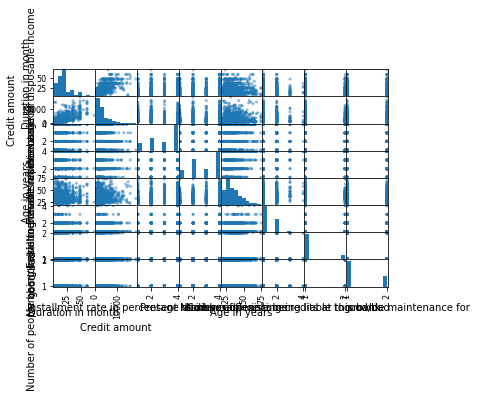

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

In [10]:
#korelasi
from pandas import set_option
set_option('precision', 2)
print(dataset.corr(method='pearson'))

                                                    Duration in month  \
Duration in month                                                1.00   
Credit amount                                                    0.62   
Installment rate in percentage of disposable in...               0.07   
Present residence since                                          0.03   
Age in years                                                    -0.04   
Number of existing credits at this bank                         -0.01   
Number of people being liable to provide mainte...              -0.02   
good/bad                                                         0.21   

                                                    Credit amount  \
Duration in month                                            0.62   
Credit amount                                                1.00   
Installment rate in percentage of disposable in...          -0.27   
Present residence since                                      0.03 

In [11]:
array = dataset.values
X = array[:,0:-1]
Y = array[:,20]
validation_size = 0.20
seed = 7
# ubah nilai yang belum numerik
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in range (0, (X.shape[1])):
    X[:,i] = encode.fit_transform(X[:,i])
y = encode.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [12]:
X

array([[0, 2, 4, ..., 0, 1, 0],
       [1, 29, 2, ..., 0, 0, 0],
       [3, 8, 4, ..., 1, 0, 0],
       ...,
       [3, 8, 2, ..., 0, 0, 0],
       [0, 27, 2, ..., 0, 1, 0],
       [1, 27, 4, ..., 0, 0, 0]], dtype=object)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train).astype('int')
X_test = sc.transform(X_test).astype('int')
#ubah ke object ke int
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [14]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
# knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
# SVM (RBF)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [41]:
print(cm)

[[117  32]
 [ 20  31]]


In [42]:
print(cr)

              precision    recall  f1-score   support

           1       0.85      0.79      0.82       149
           2       0.49      0.61      0.54        51

    accuracy                           0.74       200
   macro avg       0.67      0.70      0.68       200
weighted avg       0.76      0.74      0.75       200



In [43]:
# k-fold cross validation untuk menghindari overfitting
from sklearn.model_selection import cross_val_score, train_test_split
skor = cross_val_score(classifier, X, y, cv=5)
rata2_skor = skor.mean()
std_var = skor.std()

In [44]:
print(rata2_skor)

0.728


In [45]:
print(std_var)

0.026944387170614984


In [46]:
from sklearn.model_selection import GridSearchCV

In [27]:
#decision tree
parameters = [{'criterion': ['gini','entropy'], 'min_samples_split':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5]}]

In [28]:
#knn
parameters = [{'leaf_size': [10,20,30,40,50], 'n_neighbors':[1,2,3,4,5]}]

In [29]:
#SVM
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [33]:
#logistic regression
parameters = [{'C': [1, 10, 100, 1000], 'penalty':['l1', 'l2']}]

In [47]:
#naive bayes
parameters = [{'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}]

In [48]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [49]:
best_accuracy

0.64625

In [50]:
best_parameters

{'var_smoothing': 1e-10}